In [ ]:
"""
DATASET EXPLORATION
"""

import pandas as pd
from sklearn.model_selection import train_test_split


#Read the diabetes health indicator dataset 50:50 balanced.
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

#Perform initial checks:
print(df.shape)
print("---")
print(df.head())

#Check if null characters exist
print(df.info())


# Remove rows containing null values


In [ ]:
"""
CORRELATION BETWEEN FEATURES
"""


#Now prepare correlation matrix to show if features have any correlation with each other.
#Prepare heatmap
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(method='pearson')  # 'pearson' is default

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()


In [ ]:
"""
CORRELATION BETWEEN TARGET VARIABLE AND EACH PREDICTOR FEATURE
"""


#Now prepare correlation matrix between the target variable (Diabetes_binary) and each of the features
#and present the heatmap

corr_diabetes = df.copy()

corr_matrix = corr_diabetes.corr()

# Isolate the column corresponding to `Diabetes_binary`
corr_target = corr_matrix[['Diabetes_binary']].drop(labels=['Diabetes_binary'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()


In [ ]:
"""
INITIAL HYPERPARAMETER ANALYSIS OF SELECTED FEATURES
"""

cols = ['HighBP',
'HighChol',
'BMI',
'HeartDiseaseorAttack',
'GenHlth',
'PhysHlth',
'DiffWalk','Age',
'Income']

X = df[cols]
y = df['Diabetes_binary']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

#print(X.info())

from sklearn.linear_model import LogisticRegression

C_list = [0.00001,0.001,1,10,100,1000]

for c in C_list:
    lr_ridge = LogisticRegression(max_iter=10000,C=c)
    lr_ridge.fit(x_train,y_train)
    print('Ridge C: ',c)
    print('Train score: ',lr_ridge.score(x_train,y_train))
    print('Test score: ',lr_ridge.score(x_test,y_test))
    print(' ')

C_list = [0.00001,0.001,1,10,100,1000]

for c in C_list:
    lr_lasso = LogisticRegression(max_iter=10000,C=c, solver='liblinear', penalty='l1')
    lr_lasso.fit(x_train,y_train)
    print('Lasso C: ',c)
    print('Train score: ',lr_lasso.score(x_train,y_train))
    print('Test score: ',lr_lasso.score(x_test,y_test))
    print(' ')


# from sklearn.tree import DecisionTreeClassifier


# depths= [3,4,5]

# for d in depths:
#     tr = DecisionTreeClassifier(max_depth=d)
#     tr.fit(x_train,y_train)
#     print('Train score: ',tr.score(x_train,y_train))
#     print('Test score: ',tr.score(x_test,y_test))



    


Best pipeline:  Pipeline(steps=[('regr',
                 LogisticRegression(C=0.0517947467923121, max_iter=1000,
                                    solver='liblinear'))])
The best regression model is:
LogisticRegression(C=0.0517947467923121, max_iter=1000, solver='liblinear')
Best score is:  0.744544441686486
Best params {'regr__C': 0.0517947467923121, 'regr__penalty': 'l2'}
Best coefficients:  [[ 0.74360309  0.58067569  0.06942512  0.31894908  0.55239387 -0.00932032
   0.12162908  0.14134744 -0.07241724]]
Test data score:  0.7448084648899451


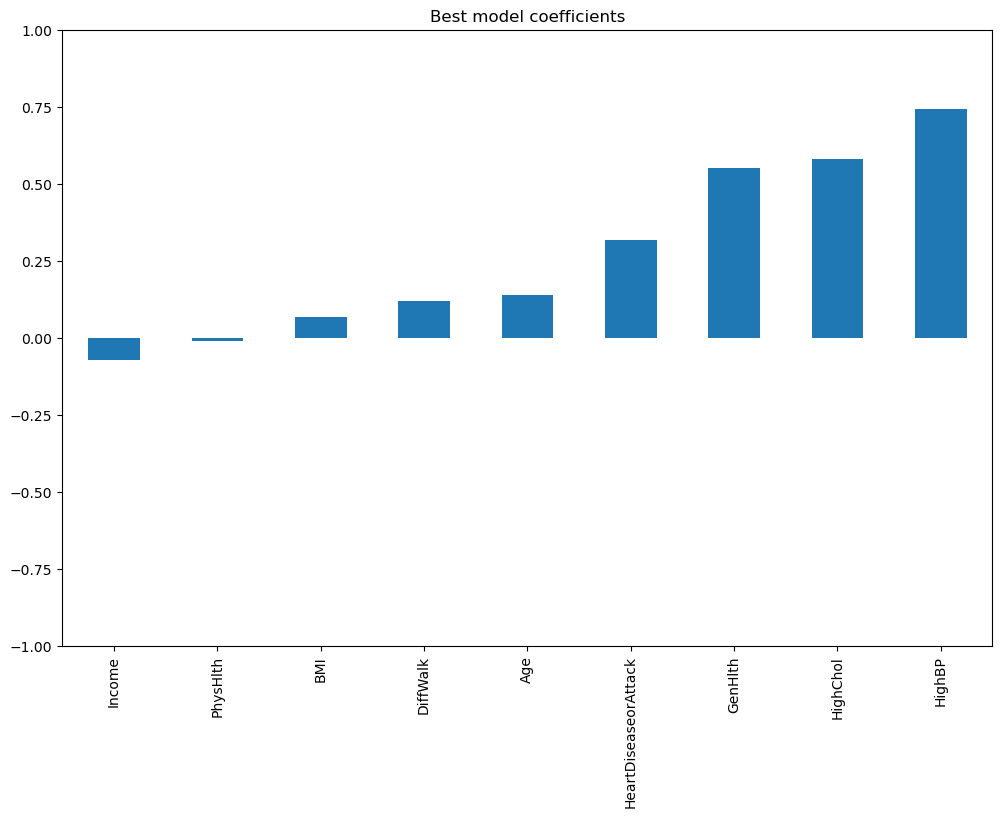

In [5]:
"""
BUILD PIPELINE
"""
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

pipeline = Pipeline([("regr",LogisticRegression(max_iter=1000,solver='liblinear'))])

parameters = {'regr__penalty': ['l1', 'l2'], 'regr__C': np.logspace(-3,3,50)}

gs = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)

gs.fit(x_train, y_train)

## Find the best pipeline
best_pipeline = gs.best_estimator_
print('Best pipeline: ',best_pipeline)
# Find the best regression model
best_regression_model = best_pipeline.named_steps['regr']
print('The best regression model is:')
print(best_regression_model)

#best score is...

print('Best score is: ', gs.best_score_)

print('Best params', gs.best_params_)


coeffs = best_regression_model.coef_
print('Best coefficients: ', coeffs)

#Check score using test data

test_score = best_regression_model.score(x_test,y_test)
print('Test data score: ', test_score)

# Chart of the coefficients

predictors = x_train.columns
coef = pd.Series(coeffs[0],predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Best model coefficients')
plt.show()




